In [217]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

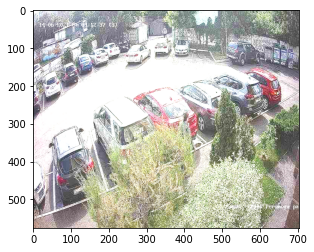

In [218]:
def read_img(path):
    t1 = cv2.imread(path)
    img = cv2.addWeighted(t1, 2.5, t1, 0, 0)
    return img
# img_hsv = cv2.cvtColor(t1, cv2.COLOR_BGR2HSV)
# img_hsv[:,:,1] = 50
# # mask = cv2.inRange(src=img_hsv, lowerb=np.array([0, 64, 153]), upperb=np.array([179, 255, 255]))
# img_hsv_modify = cv2.bitwise_and(t1, t1, mask=mask)
#
# img_mask_gray = cv2.cvtColor(img_hsv_modify, cv2.COLOR_BGR2GRAY)
# threshold_val, img_bit = cv2.threshold(img_mask_gray, 0, 255, cv2.THRESH_BINARY)

test = read_img('testimages/cam1/consequtive/1.jpg')
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
plt.show()

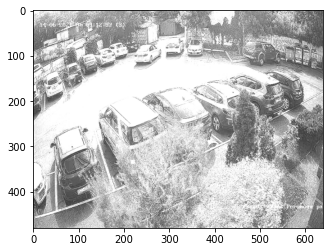

In [219]:
images = [
    cv2.cvtColor(read_img('testimages/cam1/consequtive/1.jpg'), cv2.COLOR_BGR2GRAY),
    cv2.cvtColor(read_img('testimages/cam1/consequtive/2.jpg'), cv2.COLOR_BGR2GRAY),
    cv2.cvtColor(read_img('testimages/cam1/consequtive/3.jpg'), cv2.COLOR_BGR2GRAY),
]
r = np.dstack(images)
median = np.median(r, axis=2).astype(np.uint8)
median = cv2.resize(median, (640, 480), interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_GRAY2RGB))
plt.show()

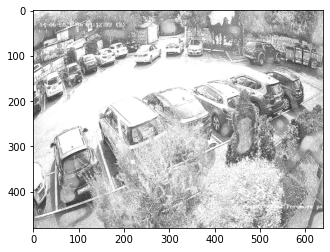

In [220]:
dilated_img = cv2.dilate(median, np.ones((15,15), np.uint8))
bg_img = cv2.medianBlur(dilated_img, 21)
diff_img = 255 - cv2.absdiff(median, bg_img)
img = cv2.normalize(diff_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
# img = cv2.medianBlur(median, 5)
# img = cv2.dilate(img, np.ones((15,15), np.uint8))
# img = cv2.normalize(img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

# img = cv2.createCLAHE().apply(median)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.show()

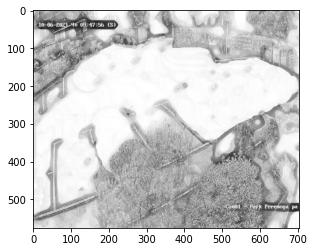

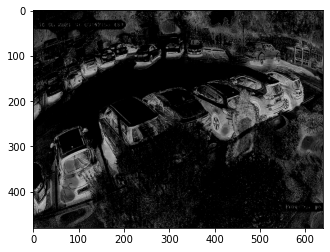

In [221]:
clean = cv2.imread("masks/clean.jpg")
clean = cv2.cvtColor(clean, cv2.COLOR_BGR2GRAY)

dilated_img = cv2.dilate(clean, np.ones((15,15), np.uint8))
bg_img = cv2.medianBlur(dilated_img, 21)
diff_img = 255 - cv2.absdiff(clean, bg_img)
clean = cv2.normalize(diff_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

plt.imshow(cv2.cvtColor(clean, cv2.COLOR_BGR2RGB))
plt.show()

clean = cv2.resize(clean, (640, 480), interpolation=cv2.INTER_AREA)
# clean = cv2.cvtColor(clean, cv2.COLOR_BGR2GRAY)
r = cv2.subtract(clean, img)
r = np.abs(r).astype(np.uint8)
# r = 255 - r
plt.imshow(cv2.cvtColor(r, cv2.COLOR_GRAY2RGB))
plt.show()

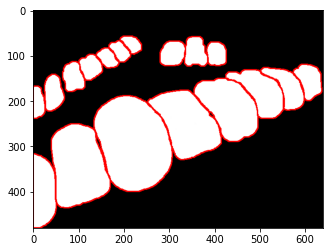

In [222]:
mask_orig = cv2.imread('masks/mask.png')
mask_orig = cv2.resize(mask_orig, (640, 480), interpolation=cv2.INTER_AREA)
mask_orig = cv2.cvtColor(mask_orig, cv2.COLOR_BGR2RGB)

r = mask_orig[:,:,0]

contours_r, _ = cv2.findContours(r, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

b = mask_orig[:,:,2]
contours_b, _ = cv2.findContours(b, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

contours = [
    contour for contour in (contours_b + contours_r)
    if 200 < cv2.contourArea(contour)
]

mask = cv2.bitwise_or(r, b)

mask_to_show = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
for contour in contours:
    cv2.drawContours(mask_to_show, [contour], 0, (255, 0, 0), 2)

plt.imshow(mask_to_show)
plt.show()

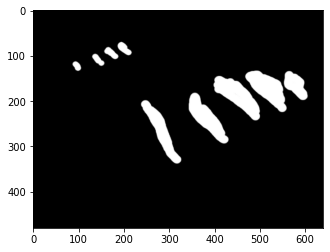

In [223]:
intersect_mask = mask_orig[:,:,1]
intersect_mask = cv2.bitwise_or(intersect_mask, intersect_mask)
plt.imshow(cv2.cvtColor(intersect_mask, cv2.COLOR_BGR2RGB))
plt.show()

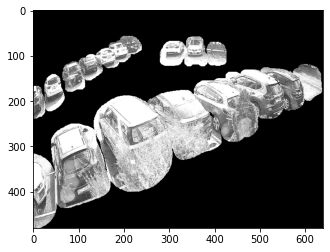

In [224]:
masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.show()

In [225]:
def crop_black(image, gray=False):
    if gray:
        _gray = image
    else:
        _gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _,_thresh = cv2.threshold(_gray,1,255,cv2.THRESH_BINARY)
    _contours, _ = cv2.findContours(_thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    x,y,w,h = cv2.boundingRect(_contours[0])
    return image[y:y+h,x:x+w]

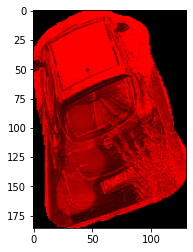

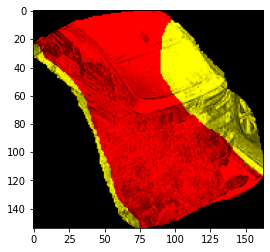

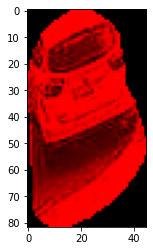

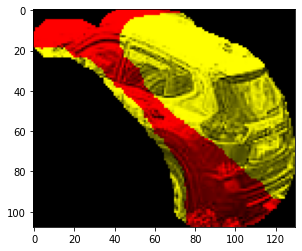

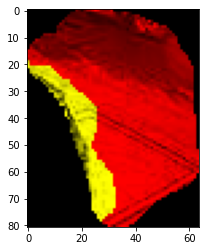

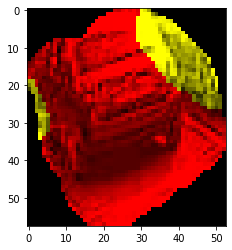

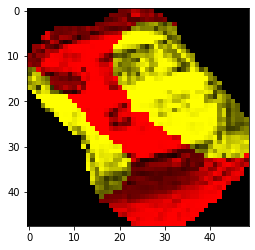

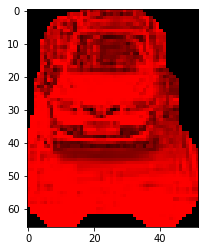

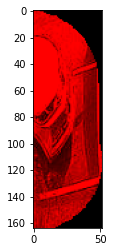

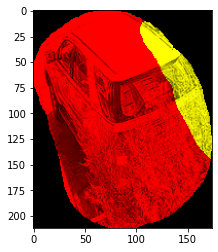

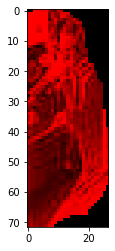

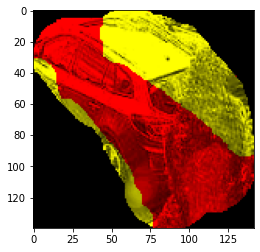

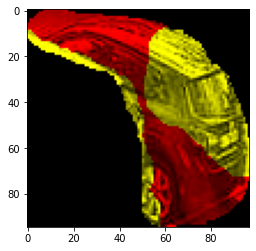

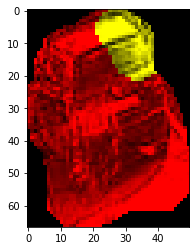

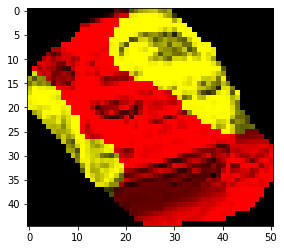

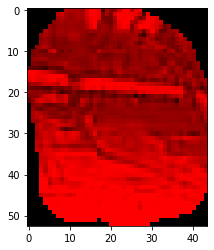

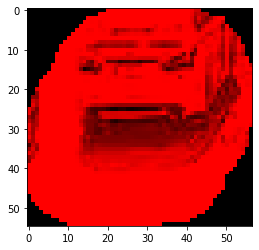

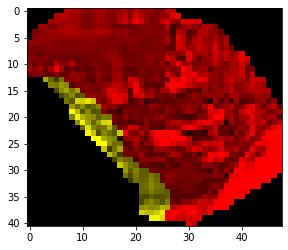

In [226]:
for contour in contours:
    lot_mask = np.zeros(mask.shape, np.uint8)
    cv2.drawContours(lot_mask, [contour], -1, 255, -1)
    lot_intersection_mask = cv2.bitwise_and(lot_mask, intersect_mask)

    masked = cv2.bitwise_and(img, img, mask=lot_mask)
    # masked_intersection = cv2.bitwise_and(img, img, mask=lot_intersection_mask)
    intersection = cv2.bitwise_and(img, img, mask=lot_intersection_mask)

    # show
    _show = np.zeros((masked.shape[0], masked.shape[1], 3), np.uint8)
    # mask_to_show = masked.copy()

    _show[:,:,0] = masked
    _show[:,:,1] = intersection

    plt.imshow(crop_black(_show))
    plt.show()

In [227]:
# cars_cascade = cv2.CascadeClassifier('haarcascade_car/haarcascade_car.xml')
# cars_cascade = cv2.CascadeClassifier('haarcascade_car/cas1.xml')
# cars_cascade = cv2.CascadeClassifier('haarcascade_car/checkcas.xml')

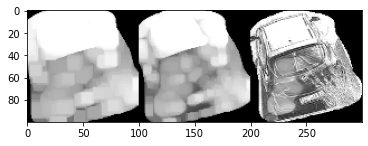

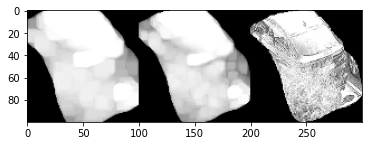

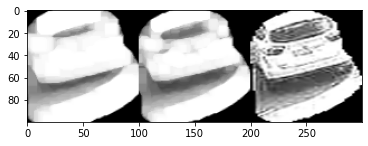

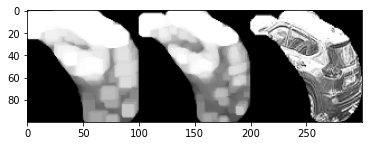

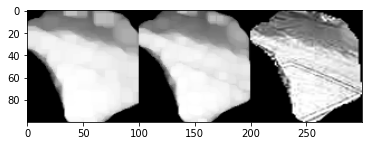

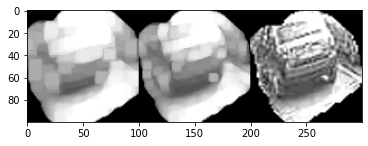

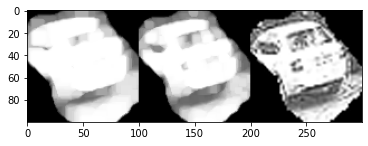

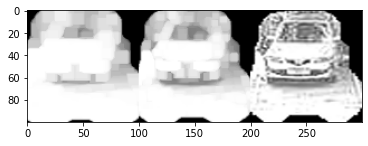

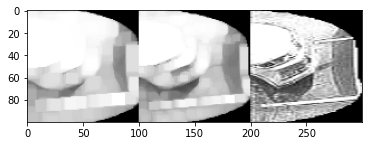

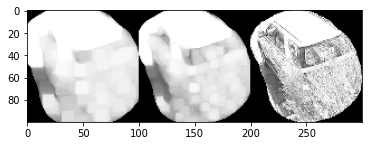

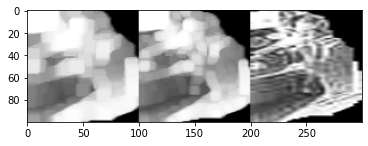

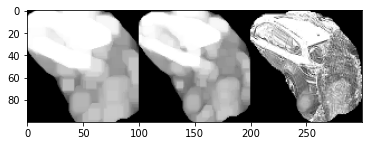

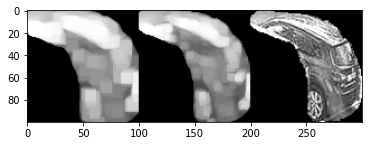

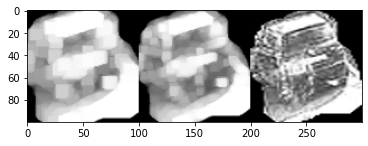

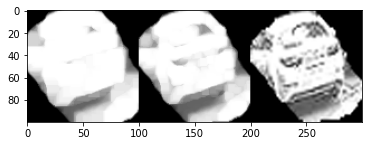

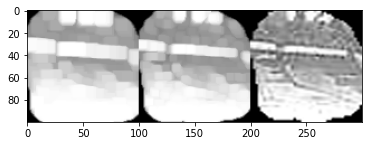

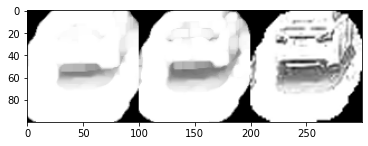

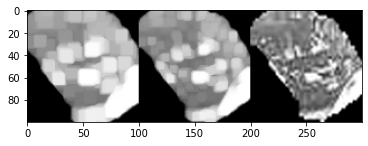

In [228]:
for contour in contours:
    lot_mask = np.zeros(mask.shape, np.uint8)
    cv2.drawContours(lot_mask, [contour], -1, 255, -1)
    lot_intersection_mask = cv2.bitwise_and(lot_mask, intersect_mask)

    masked = cv2.bitwise_and(img, img, mask=lot_mask)

    # resize(image1,image,Size(300,150),0,0,INTER_LINEAR);        //resizing image to get best experimental results

    cropped = crop_black(masked, gray=True)
    cropped = cv2.resize(cropped, (100, 100), interpolation=cv2.INTER_CUBIC)

    # improved = cv2.cvtColor(cv2.detailEnhance(cv2.cvtColor(cropped, cv2.COLOR_GRAY2RGB)), cv2.COLOR_RGB2GRAY)
    improved = cv2.medianBlur(cropped, 5)
    improved = cv2.dilate(improved, np.ones((5,5), np.uint8))
    improved = cv2.normalize(improved,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    # improved = cv2.createBackgroundSubtractorMOG2()
    # fgbg = cv2.createBackgroundSubtractorMOG2(128,cv2.THRESH_BINARY,1)
    # improved = fgbg.apply(cropped)
    # improved = cv2.GaussianBlur(cropped, (5,5), 0)
    # improved = cv2.createCLAHE().apply(improved)
    # plt.hist(clahe.ravel(), 256, [0,256])
    # _thresh = cv2.Canny(improved,100,200)
    _thresh = cv2.erode(improved, None, iterations=2)
    _thresh = cv2.dilate(_thresh, None, iterations=4)
    # _,_thresh = cv2.threshold(improved,100,255,cv2.THRESH_BINARY)

    # cars = cars_cascade.detectMultiScale(cropped, 1.02, 4)
    # for (x, y, w, h) in cars:
    #     cv2.rectangle(cropped, (x, y), (x+w,y+h), color=(0, 255, 0), thickness=2)#%%
    plt.imshow(cv2.cvtColor(cv2.hconcat([_thresh, improved, cropped]), cv2.COLOR_BGR2RGB))
    plt.show()